In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvbWlrZW5ndXllbi9wcm9qZWN0L3RpZHlmaW5hbmNl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749745530.584952, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749745530.5809522, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749745530.2849557, "/opt/anaconda3/lib/python3.13/codecs.py": 1749745530.164957, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749745530.3809545, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749745530.428954, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749745530.4809532, "/opt/anaconda3/lib/python3.13/abc.py": 1749745530.1569571, "/opt/anaconda3/lib/python3.13/io.py": 1749745530.2049568, "/opt/anaconda3/lib/python3.13/stat.py": 1749745530.256956, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749745530.168957, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749745530.1929567, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749745530.2289565, "/opt/anaconda3/lib/python3.13/os.py": 1749745530.2209566, "/opt/anaconda3/lib/python3.13/_sitebuiltins.

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import statsmodels.formula.api as smf


from regtabletotext import prettify_result

In [3]:
tidy_finance = sqlite3.connect(
  database="data/tidy_finance_python.sqlite"
)

prices_monthly = (pd.read_sql_query(
    sql=("SELECT symbol, date, ret_excess, mktcap, risk_free,"
         "mktcap_lag FROM prices_monthly"),
    con=tidy_finance,
    parse_dates={"date"})
  .dropna()
)

comp_vn = (pd.read_sql_query(
    sql="SELECT symbol, datadate, be, op, inv FROM comp_vn",
    con=tidy_finance,
    parse_dates={"datadate"})
  .dropna()
)

In [4]:
# 1. Size (June Market Cap)
size = (prices_monthly
  .query("date.dt.month == 6")
  # Use MonthBegin(1) to set to July 1st
  .assign(sorting_date=lambda x: x["date"] + pd.offsets.MonthBegin(1))
  .get(["symbol", "sorting_date", "mktcap"])
  .rename(columns={"mktcap": "size"})
)
size.head(3)

# 2. Market Equity (December Market Cap for BM scaling)
market_equity = (prices_monthly
  .query("date.dt.month == 12")
  # Shift December t-1 to July 1st of year t
  .assign(sorting_date=lambda x: x["date"] + pd.offsets.MonthBegin(7))
  .get(["symbol", "sorting_date", "mktcap"])
  .rename(columns={"mktcap": "me"})
)
market_equity.head(3)

# 3. Calculate Book-to-Market (BM) with Correct Scaling
book_to_market = (comp_vn
    .assign(
        sorting_date=lambda x: pd.to_datetime((x["datadate"].dt.year + 1).astype(str) + "-07-01")
    )
    .merge(market_equity, how="inner", on=["symbol", "sorting_date"])
    # Adjusted scaling: Dividing BE by 1,000,000,000 to convert absolute VND to Billions
    # to match the scale of your Market Equity (me)
    .assign(bm=lambda x: x["be"] / (x["me"] * 1000000000)) 
    [["symbol", "sorting_date", "me", "bm"]]
)

# SANITY CHECK
print(f"New Median BM Ratio: {book_to_market['bm'].median():.4f}")
book_to_market.head(3)

# Sanity Check: Print the median BM to ensure it is near 1.0
print(f"Median BM Ratio: {book_to_market['bm'].median():.4f}")

# 4. Final Merge (This should now work)
sorting_variables = (size
  .merge(book_to_market, how="inner", on=["symbol", "sorting_date"])
  .dropna()
  .drop_duplicates(subset=["symbol", "sorting_date"])
)
sorting_variables.head(3)

New Median BM Ratio: 1.1769
Median BM Ratio: 1.1769


,symbol,sorting_date,size,me,bm
0,A32,2019-07-01,153.00,205.36,0.977852
1,A32,2020-07-01,178.84,190.40,1.174437
2,A32,2021-07-01,217.60,234.60,1.032468


In [5]:
def assign_portfolio(data, sorting_variable, percentiles):
    """Assign portfolios to a bin according to a sorting variable."""
    
    # Calculate breakpoints based on quantile sequences
    breakpoints = (data
      .get(sorting_variable)
      .quantile(percentiles, interpolation="linear")
      .drop_duplicates()
    )
    
    # Ensure the range covers all possible values
    breakpoints.iloc[0] = -np.inf
    breakpoints.iloc[breakpoints.size-1] = np.inf
    
    # Categorize into bins
    assigned_portfolios = pd.cut(
      data[sorting_variable],
      bins=breakpoints,
      labels=pd.Series(range(1, breakpoints.size)),
      include_lowest=True,
      right=False
    )
    
    return assigned_portfolios

# 1. Assign Portfolios (Annual Sorts)
# We calculate breakpoints and assign portfolios 1-2 for size and 1-3 for BM
portfolios_assigned = (sorting_variables
  .groupby("sorting_date")
  .apply(lambda x: x.assign(
      portfolio_size=assign_portfolio(x, "size", [0, 0.5, 1]),
      portfolio_bm=assign_portfolio(x, "bm", [0, 0.3, 0.7, 1])
    ), include_groups=False)
  .reset_index()
  # We keep 'size' and 'bm' here so they are available after the merge
  .get(["symbol", "sorting_date", "portfolio_size", "portfolio_bm", "size", "bm"])
)

# 2. Merge Portfolios to Monthly Returns
# Portfolios formed in July are held until June of the following year
portfolios = (prices_monthly
  .assign(
    sorting_date=lambda x: pd.to_datetime(
        np.where(x["date"].dt.month <= 6,
                 (x["date"].dt.year - 1).astype(str) + "0701",
                 x["date"].dt.year.astype(str) + "0701")
    )
  )
  .merge(portfolios_assigned, how="inner", on=["symbol", "sorting_date"])
)

In [6]:
# Check the count of stocks in each portfolio combination for the most recent year
portfolio_counts = (portfolios
    .query("date == date.max()")
    .groupby(["portfolio_size", "portfolio_bm"], observed=True)
    .size()
    .unstack()
)
print("Portfolio Counts (Size x BM):")
print(portfolio_counts)

Portfolio Counts (Size x BM):
portfolio_bm      1    2    3
portfolio_size               
1               112  269  264
2               275  247  124


In [7]:
# Verify that higher portfolio numbers correspond to higher BM values
bm_check = (portfolios
    .groupby("portfolio_bm", observed=True)
    .agg({"bm": ["mean", "median", "min", "max"]})
)
print("\nBM Characteristic Check:")
print(bm_check)


BM Characteristic Check:
                    bm                                
                  mean    median       min         max
portfolio_bm                                          
1             0.597140  0.585077  0.001416    1.435144
2             1.259447  1.186739  0.584759    2.737556
3             3.376258  2.454002  1.018822  272.189334


In [8]:
# Trace a single symbol (e.g., 'A32') across a formation window
persistence_check = (portfolios
    .query("symbol == 'A32' & date >= '2022-01-01' & date <= '2023-12-31'")
    .sort_values("date")
    [['symbol', 'date', 'sorting_date', 'portfolio_size', 'portfolio_bm']]
)
print("\nTemporal Persistence Check (Symbol A32):")
print(persistence_check.head(15))


Temporal Persistence Check (Symbol A32):
   symbol       date sorting_date portfolio_size portfolio_bm
30    A32 2022-01-31   2021-07-01              1            2
31    A32 2022-02-28   2021-07-01              1            2
32    A32 2022-03-31   2021-07-01              1            2
33    A32 2022-04-30   2021-07-01              1            2
34    A32 2022-05-31   2021-07-01              1            2
35    A32 2022-06-30   2021-07-01              1            2
36    A32 2022-07-31   2022-07-01              1            3
37    A32 2022-08-31   2022-07-01              1            3
38    A32 2022-09-30   2022-07-01              1            3
39    A32 2022-10-31   2022-07-01              1            3
40    A32 2022-11-30   2022-07-01              1            3
41    A32 2022-12-31   2022-07-01              1            3
42    A32 2023-01-31   2022-07-01              1            3
43    A32 2023-02-28   2022-07-01              1            3
44    A32 2023-03-31   2022-

In [9]:
factors = (portfolios
  .groupby(["portfolio_size", "portfolio_bm", "date"])
  .apply(lambda x: pd.Series({
    "ret": np.average(x["ret_excess"], weights=x["mktcap_lag"])
    })
   )
  .reset_index()
  .groupby("date")
  .apply(lambda x: pd.Series({
    "smb": (
      x["ret"][x["portfolio_size"] == 1].mean() - 
        x["ret"][x["portfolio_size"] == 2].mean()),
    "hml": (
      x["ret"][x["portfolio_bm"] == 3].mean() -
        x["ret"][x["portfolio_bm"] == 1].mean())
    }))
  .reset_index()
)

factors.head(3)

,date,smb,hml
0,2011-07-31,-0.007768,0.002754
1,2011-08-31,-0.067309,0.011474
2,2011-09-30,0.014884,0.022854


In [10]:
## Fama-French Three-Factor Model
# --- Calculate Market Factor independently ---
# This uses the entire prices_monthly universe to represent the broad market
factor_market_excess = (prices_monthly
  .groupby("date")
  .apply(lambda x: pd.Series({
      "mkt_excess": np.average(x["ret_excess"], weights=x["mktcap_lag"])
    }), include_groups=False)
  .reset_index()
)

# --- Merge ---
# Combine your replicated SMB/HML with the Market Factor
factors_ff3_monthly = (factors
  .merge(factor_market_excess, on="date", how="inner")
)

factors_ff3_monthly.head(3)

,date,smb,hml,mkt_excess
0,2011-07-31,-0.007768,0.002754,-0.067002
1,2011-08-31,-0.067309,0.011474,0.049073
2,2011-09-30,0.014884,0.022854,-0.017362


In [11]:
# Remove rows with missing factor values
# We keep only rows where the characteristic factors are fully populated
factors_ff3_monthly = (factors_ff3_monthly
    .dropna(subset=["smb", "hml", "mkt_excess"])
    .reset_index(drop=True)
)

# Sanity Check
print(f"Factors cleaned. Sample period: {factors_ff3_monthly['date'].min().date()} to {factors_ff3_monthly['date'].max().date()}")
print("\nFirst 3 rows of cleaned factors:")
print(factors_ff3_monthly.head(3))

Factors cleaned. Sample period: 2011-07-31 to 2023-12-31

First 3 rows of cleaned factors:
        date       smb       hml  mkt_excess
0 2011-07-31 -0.007768  0.002754   -0.067002
1 2011-08-31 -0.067309  0.011474    0.049073
2 2011-09-30  0.014884  0.022854   -0.017362


In [12]:
# --- Save to Database ---
(factors_ff3_monthly
  .to_sql(name="factors_ff3_monthly", 
          con=tidy_finance, 
          if_exists="replace",
          index=False)
)

150

In [13]:
# Ensure your BM median is ~1.17 and max is not 272
# adjust the 1e9 based on your 'me' scale
other_sorting_variables = (comp_vn
  .assign(
    sorting_date=lambda x: (pd.to_datetime(
      (x["datadate"].dt.year+1).astype(str)+"0701", format="%Y%m%d")
    )
  )
  .merge(market_equity, how="inner", on=["symbol", "sorting_date"])
  .assign(bm=lambda x: x["be"]/1e9/x["me"])
  .get(["symbol", "sorting_date", "me", "bm", "op", "inv"])
)

print(other_sorting_variables['bm'].median())

# Independent Size Sort
sorting_variables = (size
  .merge(other_sorting_variables, how="inner", on=["symbol", "sorting_date"])
  .dropna()
  .drop_duplicates(subset=["symbol", "sorting_date"])
 )

1.1769106858249534


In [14]:
from scipy.stats.mstats import winsorize

# Winsorize Characteristics (1st and 99th percentiles)
# This handles your extreme 272.18 BM values.
vars_to_clean = ["bm", "op", "inv"]
for var in vars_to_clean:
    sorting_variables[var] = winsorize(sorting_variables[var], limits=[0.01, 0.01])


# Use transform to keep columns exactly as they are
sorting_variables['portfolio_size'] = (sorting_variables
  .groupby('sorting_date', group_keys=False)
  .apply(lambda x: assign_portfolio(x, 'size', [0, 0.5, 1]))
  .values
)

# Dependent Sorts (Sub-grouping)
# We calculate each characteristic portfolio one by one to avoid KeyError
def dependent_sort(df, var, name):
    return (df.groupby(['sorting_date', 'portfolio_size'], group_keys=False)
            .apply(lambda x: assign_portfolio(x, var, [0, 0.3, 0.7, 1])))

sorting_variables['portfolio_bm'] = dependent_sort(sorting_variables, 'bm', 'portfolio_bm').values
sorting_variables['portfolio_op'] = dependent_sort(sorting_variables, 'op', 'portfolio_op').values
sorting_variables['portfolio_inv'] = dependent_sort(sorting_variables, 'inv', 'portfolio_inv').values

# --- Column Selection for Sorting Variables ---
portfolios_sorting = sorting_variables.get([
    "symbol", "sorting_date", "portfolio_size", 
    "portfolio_bm", "portfolio_op", "portfolio_inv"
])
portfolios_sorting.head(3)

,symbol,sorting_date,portfolio_size,portfolio_bm,portfolio_op,portfolio_inv
0,A32,2019-07-01,2,2,3,2
1,A32,2020-07-01,2,2,2,3
2,A32,2021-07-01,2,2,2,1


In [15]:
# Verify that higher portfolio numbers have higher median characteristics
sanity_check = (sorting_variables
    .groupby("portfolio_op")["op"].median()
)
print("Median OP by Portfolio (Should be strictly increasing):")
print(sanity_check)

Median OP by Portfolio (Should be strictly increasing):
portfolio_op
1    0.139804
2    0.133405
3    0.138398
Name: op, dtype: float64


In [16]:
# Check the 2x3 grid for Profitability
rmw_counts = sorting_variables.groupby(["portfolio_size", "portfolio_op"]).size().unstack()
print("\nStocks per Size/Profitability Bin:")
print(rmw_counts)


Stocks per Size/Profitability Bin:
portfolio_op       1     2     3
portfolio_size                  
1               1825  2369  1819
2               1789  2434  1796


In [17]:
# --- Merge with FULL monthly return data ---
# This step is crucial. It adds 'date', 'ret_excess', and 'mktcap_lag'
# which are missing from your current 'portfolios' object.
portfolios_full = (prices_monthly
  .assign(
    sorting_date=lambda x: pd.to_datetime(
      np.where(x["date"].dt.month <= 6, 
               (x["date"].dt.year - 1).astype(str) + "0701", 
               x["date"].dt.year.astype(str) + "0701")
    )
  )
  .merge(portfolios_sorting, how="inner", on=["symbol", "sorting_date"])
)

# --- Construct the Value Factor (HML) ---
portfolios_value = (portfolios_full
  .groupby(["portfolio_size", "portfolio_bm", "date"], group_keys=False)
  .apply(lambda x: pd.Series({
      "ret": np.average(x["ret_excess"], weights=x["mktcap_lag"])
    })
  )
  .reset_index()
)

factors_value = (portfolios_value
  .groupby("date")
  .apply(lambda x: pd.Series({
    "hml": (
      x["ret"][x["portfolio_bm"] == 3].mean() - 
        x["ret"][x["portfolio_bm"] == 1].mean())})
  , include_groups=False)
  .reset_index()
)

In [18]:
# --- Construct the Profitability Factor (RMW) ---
portfolios_profitability = (portfolios_full
  .groupby(["portfolio_size", "portfolio_op", "date"], group_keys=False)
  .apply(lambda x: pd.Series({
      "ret": np.average(x["ret_excess"], weights=x["mktcap_lag"])
    })
  )
  .reset_index()
)

factors_profitability = (portfolios_profitability
  .groupby("date")
  .apply(lambda x: pd.Series({
    "rmw": (
      x["ret"][x["portfolio_op"] == 3].mean() - 
        x["ret"][x["portfolio_op"] == 1].mean())})
  , include_groups=False)
  .reset_index()
)

In [19]:
# --- 5. Construct the Investment Factor (CMA) ---
portfolios_investment = (portfolios_full
  .groupby(["portfolio_size", "portfolio_inv", "date"], group_keys=False)
  .apply(lambda x: pd.Series({
      "ret": np.average(x["ret_excess"], weights=x["mktcap_lag"])
    })
  )
  .reset_index()
)

factors_investment = (portfolios_investment
  .groupby("date")
  .apply(lambda x: pd.Series({
    "cma": (
      x["ret"][x["portfolio_inv"] == 1].mean() - 
        x["ret"][x["portfolio_inv"] == 3].mean())})
  , include_groups=False)
  .reset_index()
)

In [20]:
# --- Construct the Size Factor (SMB) ---
factors_size = (
  pd.concat(
    [portfolios_value, portfolios_profitability, portfolios_investment], 
    ignore_index=True
  )
  .groupby("date")
  .apply(lambda x: pd.Series({
    "smb": (
      x["ret"][x["portfolio_size"] == 1].mean() - 
        x["ret"][x["portfolio_size"] == 2].mean())})
  , include_groups=False)
  .reset_index()
)

In [21]:
# --- Calculate Market Factor independently ---
# This uses the entire prices_monthly universe
factor_market_excess = (prices_monthly
  .groupby("date")
  .apply(lambda x: pd.Series({
      "mkt_excess": np.average(x["ret_excess"], weights=x["mktcap_lag"])
    }), include_groups=False)
  .reset_index()
)

In [22]:
factors = (factors_size
  .merge(factors_value, how="outer", on="date")
  .merge(factors_profitability, how="outer", on="date")
  .merge(factors_investment, how="outer", on="date")
  .merge(factor_market_excess, how="outer", on="date")
  
)

# Check correlations
print("Factor Correlation Matrix (Vietnam):")
print(factors.drop(columns="date").corr())

Factor Correlation Matrix (Vietnam):
                 smb       hml       rmw       cma  mkt_excess
smb         1.000000  0.215982 -0.045441  0.145660    0.004216
hml         0.215982  1.000000 -0.402912  0.042314   -0.007630
rmw        -0.045441 -0.402912  1.000000 -0.237680   -0.077586
cma         0.145660  0.042314 -0.237680  1.000000    0.274396
mkt_excess  0.004216 -0.007630 -0.077586  0.274396    1.000000


In [23]:
#| label: factor-summary
# Check the average monthly premium of each factor
print("Average Monthly Factor Premiums:")
print(factors.drop(columns="date").mean() * 100) # In percent

Average Monthly Factor Premiums:
smb          -0.366683
hml          -0.272497
rmw           0.066485
cma           0.166616
mkt_excess   -1.297145
dtype: float64


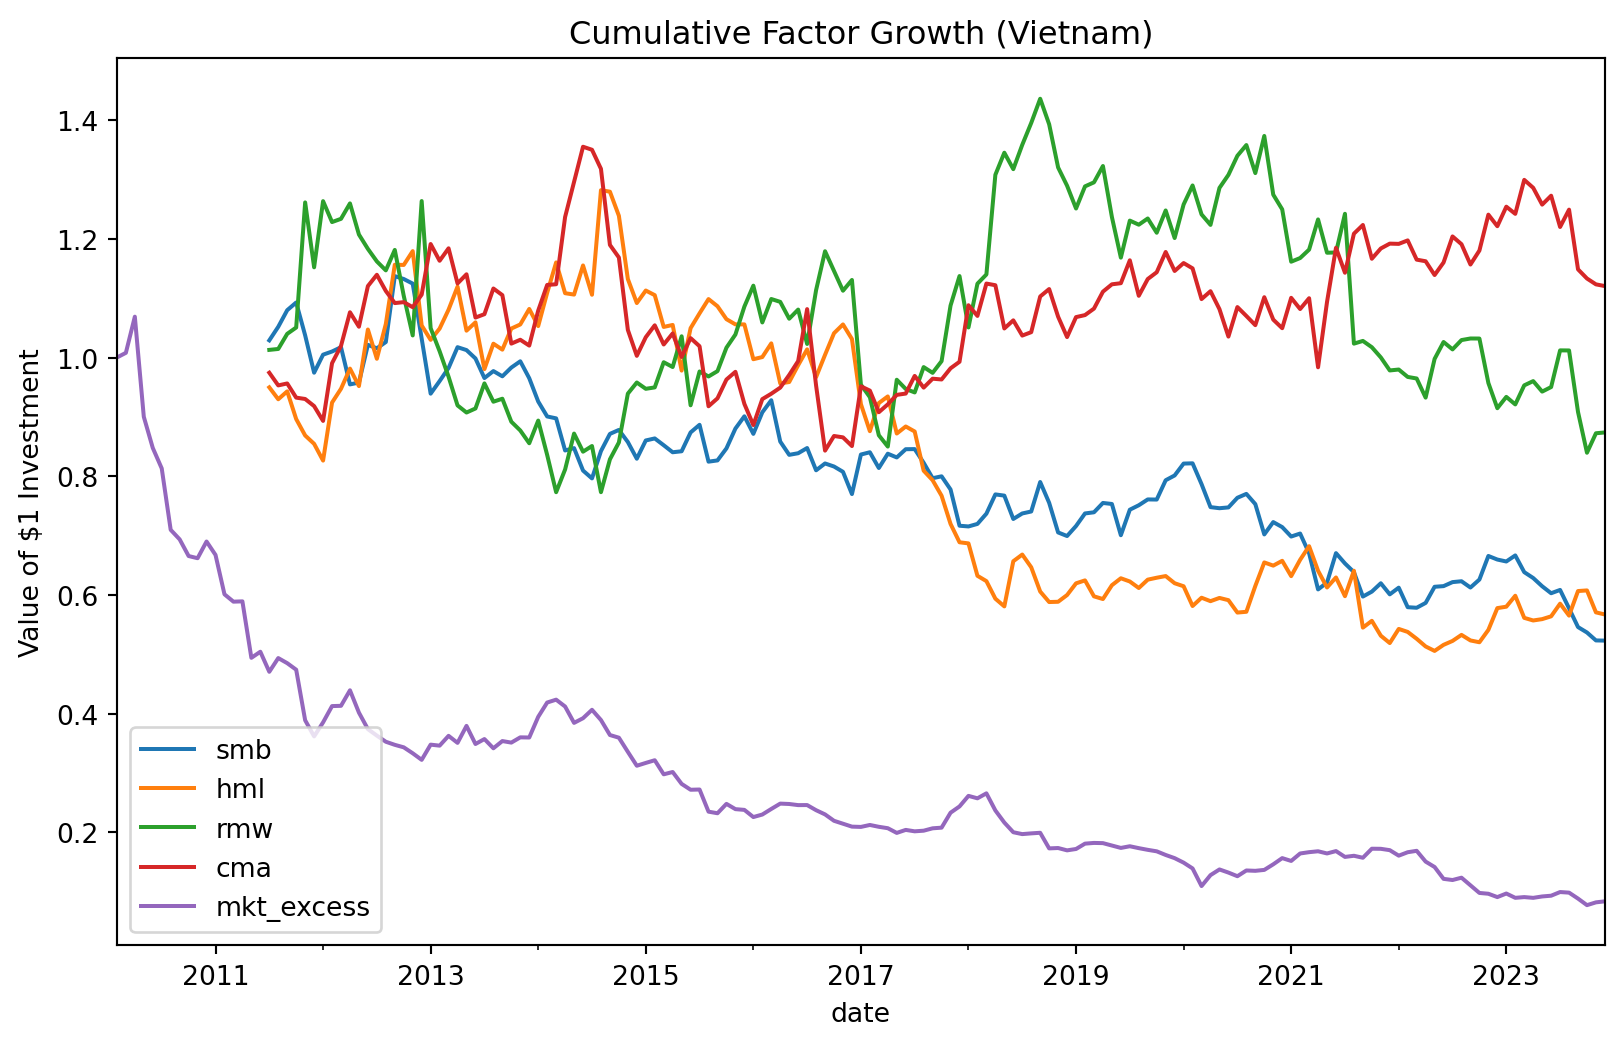

In [24]:
#| label: cumulative-plot
import matplotlib.pyplot as plt

factors_cum = (factors.set_index("date")
  .add(1).cumprod()
)
factors_cum.plot(figsize=(10, 6), title="Cumulative Factor Growth (Vietnam)")
plt.ylabel("Value of $1 Investment")
plt.show()

In [25]:
# Remove rows with missing factor values
# We keep only rows where the characteristic factors are fully populated
factors_ff5_monthly = (factors
    .dropna(subset=["smb", "hml", "rmw", "cma", "mkt_excess"])
    .reset_index(drop=True)
)

# Sanity Check
print(f"Factors cleaned. Sample period: {factors_ff5_monthly['date'].min().date()} to {factors_ff5_monthly['date'].max().date()}")
print("\nFirst 3 rows of cleaned factors:")
print(factors_ff5_monthly.head(3))

Factors cleaned. Sample period: 2011-07-31 to 2023-12-31

First 3 rows of cleaned factors:
        date       smb       hml       rmw       cma  mkt_excess
0 2011-07-31  0.029280 -0.049915  0.013239 -0.025244   -0.067002
1 2011-08-31  0.022241 -0.021097  0.001543 -0.021929    0.049073
2 2011-09-30  0.026609  0.014323  0.025125  0.003444   -0.017362


In [26]:
(factors_ff5_monthly
  .to_sql(name="factors_ff5_monthly", 
          con=tidy_finance, 
          if_exists="replace",
          index=False)
)

150